<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Árvores de Decisão</font></h1>


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Introdução

Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Estes modelos utilizam a estratégia de dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema.

```
As árvores de decisão estão entre os mais populares algoritmos de inferência e tem sido aplicado em várias áreas como, por exemplo, diagnóstico médico e
risco de crédito.
```



**Exemplos**:

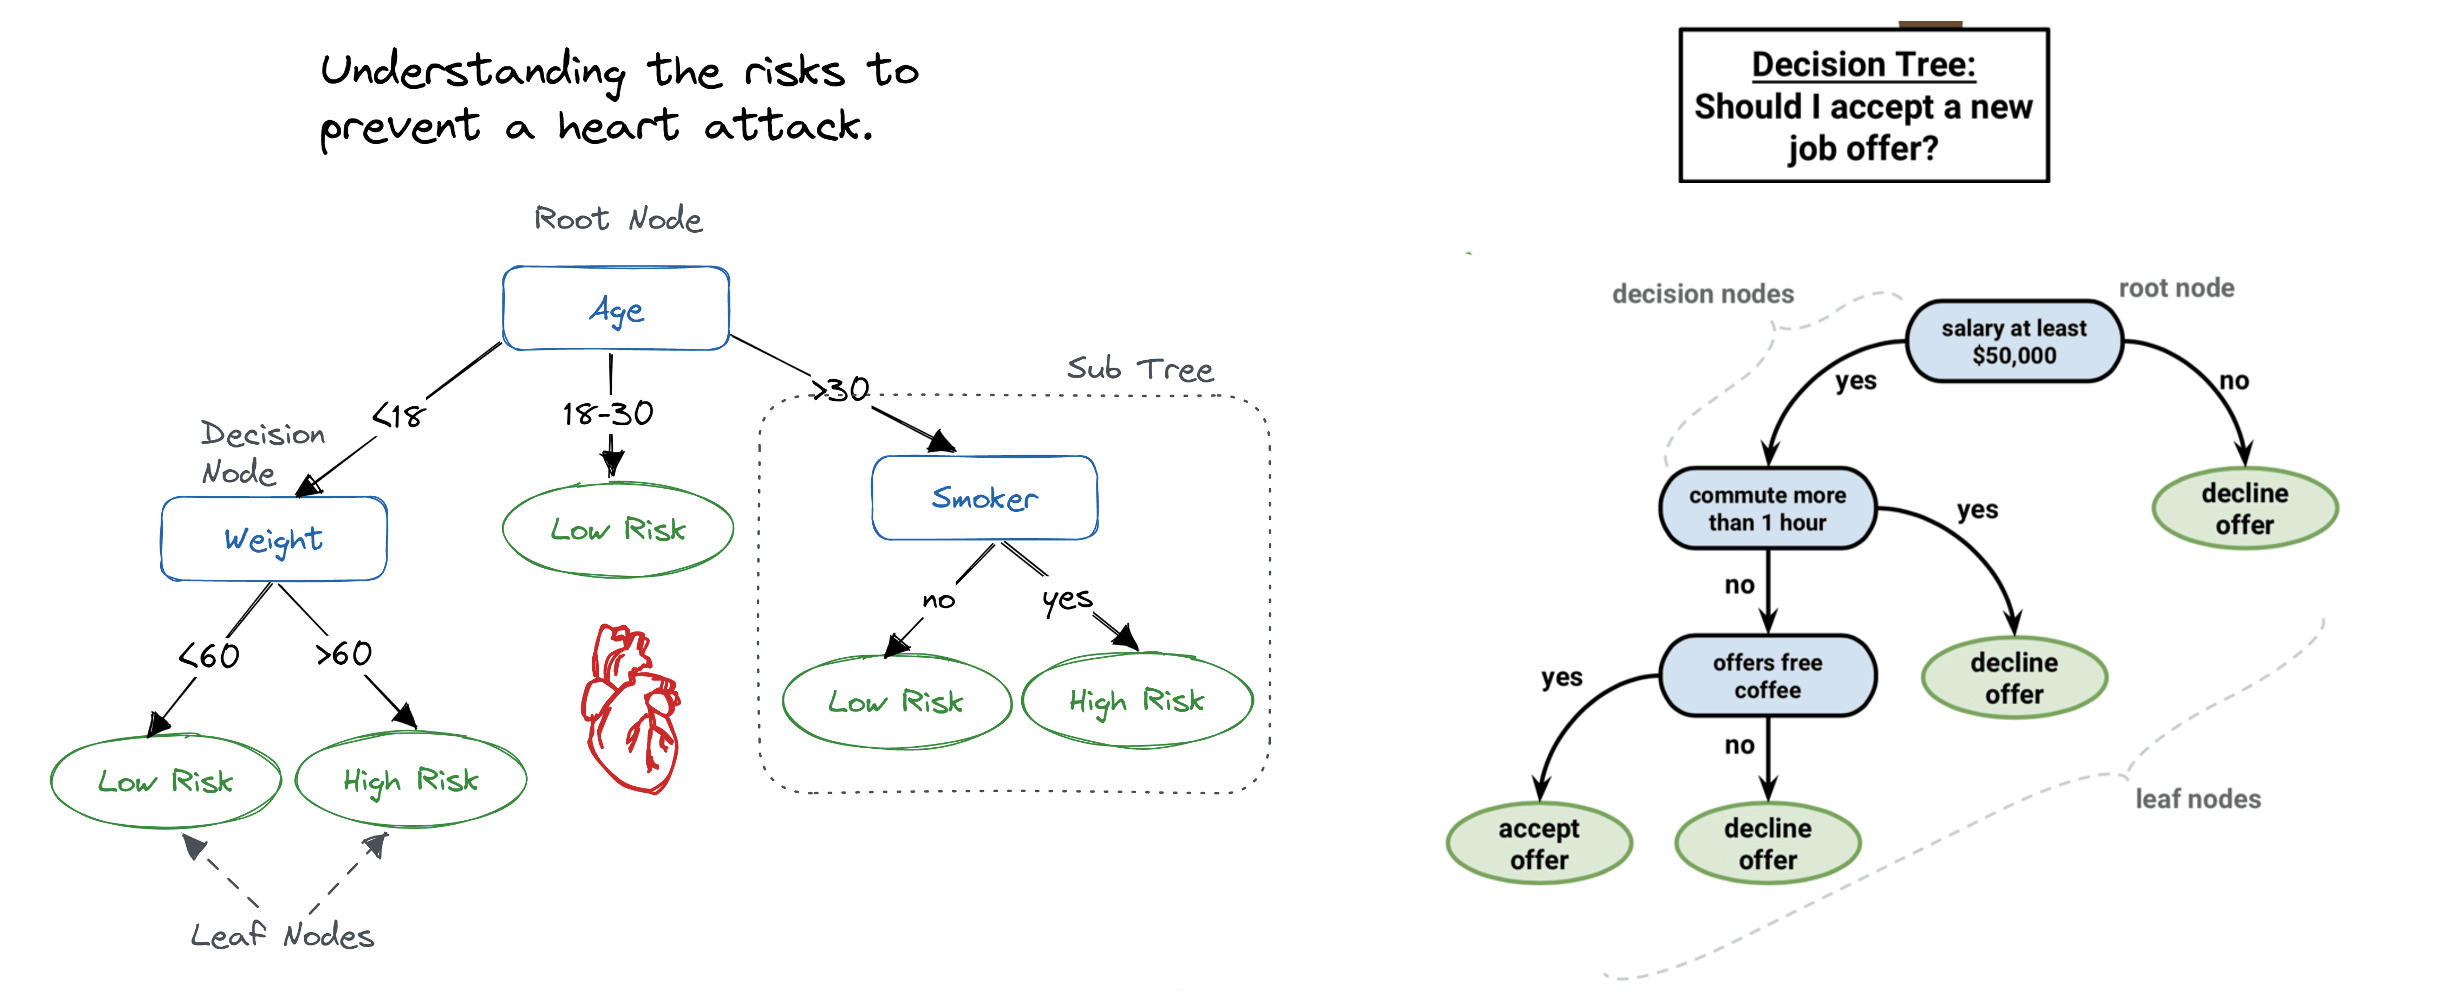

O critério utilizado para realizar as partições é o da utilidade do atributo para a classificação. Aplica-se, por este critério, um determinado ganho de informação a cada atributo. O atributo escolhido como atributo teste para o corrente nó é aquele que possui o **maior ganho de informação**.

Nos casos em que a árvore é usada para classificação, os critérios de partição mais conhecidos são baseados na **entropia e índice Gini**.

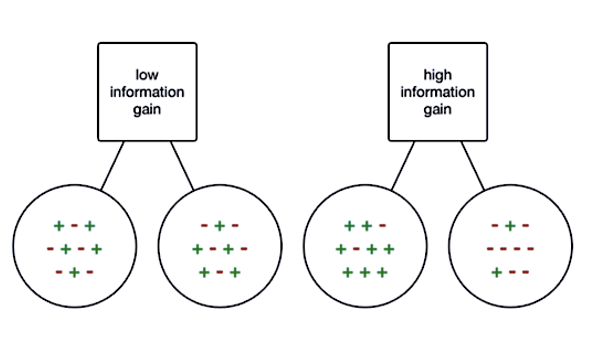

#### Entropia
A entropia caracteriza a impureza dos dados: é uma medida da falta de homogeneidade dos dados de entrada em relação a sua classificação. Por exemplo, a entropia é máxima (igual a 1) quando o conjunto de dados é heterogêneo.

Dado um conjunto de entrada (S) que pode ter c classes distintas, a entropia de S será dada por

$$ Entropia(s) =  \sum_i^c -p_i \times log_2(p_i), $$
em que  $p_i$ é a proporção de dados em S que pertencem à classe i.

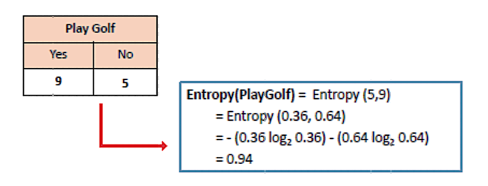

### Gini

O índice Gini mede o grau de heterogeneidade dos dados. Logo, pode ser utilizado para medir a impureza de um nó.

$$ Gini(s) = 1 - \sum_i^c p^2_i $$

em que $p_i$ é a freqüência relativa de cada classe em cada nó. Quando este índice é igual a zero, o nó é puro. Por outro lado, quando ele se aproxima do valor um, o nó é impuro (aumenta o número de classes uniformemente distribuídas neste nó).

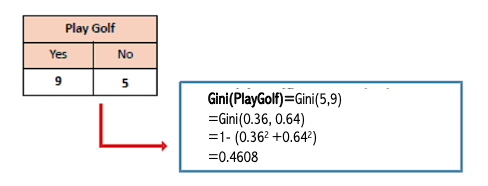

O índice de Gini tem impureza máxima de 0,5 e pureza máxima é 0, enquanto Entropia tem impureza máxima de 1 e pureza máxima é 0.

### Information Gain

Assuma que temos uma base de dados de 15 alunos cuja variável resposta: Pass (P) o Fail (F) um exame. Temos duas variáveis explicativas: Working Status ( Yes/not) e Student Background (Maths, CS, Other). Qual pergunta traz o maior ganho de informação?

<img src="http://www.orlandoalbarracin.com.br/phyton/entropia.png" width=700, align="left">

Prós e Limitações do Modelo árvore de decisão

Prós:

* Não é um modelo *black-box*
* É eficiente
* Permite trabalhar diretamente com valores categóricos

Limitações
* Tem um alto custo de treinamento
* É sensível a sobreajuste(\*)

(\*) Para minimizar esse efeito pode-se fazer a *poda* de níveis da Árvore ou emprego de **Random Forests**.


## Exemplo :
<h3> Caso: Predição de Diagnóstico </h3>

Agora vamos ver um caso de dados reais. [Dados](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))



Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.




In [2]:
breast = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
breast = breast.drop(columns=['Unnamed: 32'])
breast.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
# Explorando os dados
breast.shape

(569, 32)

In [4]:
# Explorando os dados
breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# Explorando os dados
breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# Explorando os dados
breast.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Árvore de Decisão: Treinamento e Teste

Os conjuntos de Treinamento e Teste são produzidos **randomicamente**. O `seed` é a semente de geração aleatória e garante a reprodutibilidade das execuções.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Preparando os dados
X = breast.drop(columns=['diagnosis'])
y = breast['diagnosis']

# Separando os dados de Treinamento e Teste
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

# Declarando o Modelo
clf = DecisionTreeClassifier(criterion='gini',random_state=seed)
#clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=None,random_state=seed)

# Aprendizado
clf.fit(X_train, y_train)                  # Emprega o conjunto de treinamento
y_pred = clf.predict(X_test)
print(y_pred)


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B']


### Avaliando o ajuste

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:
# Que tão bom é o modelo?
pd.DataFrame({"Valores observados":y_test,
              "Valores preditos": y_pred})


,Valores observados,Valores preditos
168,M,M
426,B,B
381,B,B
451,M,M
338,B,B
...,...,...
29,M,M
489,M,B
285,B,B
130,B,B


In [10]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   5],
       [  7,  57]])

In [11]:
# Acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9298245614035088

In [12]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.95      0.94       107
           M       0.92      0.89      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### Exibindo a Árvore

Não vamos trabalhar com o gráfico das Árvores. Mas deixamos o código aqui para que você empregue se tiver interesse.

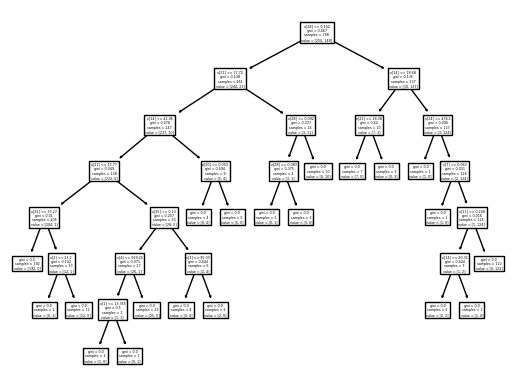

In [13]:
from sklearn import tree
tree.plot_tree(clf);

### Opções código!

- **min_samples_leaf** (Número Mínimo de Amostras em uma Folha):
Se o número de amostras em uma folha for menor do que o valor definido em **min_samples_leaf**, então a divisão (split) não será realizada e a folha será considerada pura.

- **min_samples_split** (Número Mínimo de Amostras para Divisão):
número mínimo de amostras necessárias para realizar uma divisão em um nó (um ponto onde a árvore se ramifica).
Se o número de amostras em um nó for menor do que o valor definido em min_samples_split, então a divisão não será realizada, e esse nó se tornará uma folha (caso contrário, a árvore continuará dividindo).

- **max_depth**(Profundidade Máxima da Árvore):
Define o número máximo de níveis ou camadas que a árvore de decisão pode ter a partir do nó raiz (o topo da árvore).
